CS 249 Final Project Notebook <br>
Author: Rachel Tsai, Huy Le, Zi Yan Zhang<br>
Course: CS 249<br>
Semester: Fall 2025<br>
School: San Jose State University<br>

In [234]:
import os
import io
import sys
import csv
import copy
import pandas as pd
import numpy as np
import math
import random
import statistics
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import tensorflow as tf
from operator import itemgetter
from tensorflow import keras
from keras import Input
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes, serialization
import json
import io
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives.serialization import pkcs12, PrivateFormat, PublicFormat, Encoding, load_pem_public_key
from cryptography.hazmat.backends import default_backend

Load the datasets one for the demo and one for a full simulation

In [235]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_full = copy.deepcopy(x_train)
y_train_full = copy.deepcopy(y_train)
x_test_full = copy.deepcopy(x_test)
y_test_full = copy.deepcopy(y_test)

x_train = x_train[0:6000]
y_train = y_train[0:6000]
x_test = x_test[0:1000]
y_test = y_test[0:1000]


Turn the output data to a categorical data

In [236]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

y_train_full = tf.keras.utils.to_categorical(y_train_full, num_classes=10)
y_test_full = tf.keras.utils.to_categorical(y_test_full, num_classes=10)

Deep Neural Network Model <br>
Input (28x28 grayscale image)
-> Convolutional Layer (e.g., 32 filters, 3x3 kernel)<br>
-> Activation (ReLU)<br>
-> Max Pooling Layer (e.g., 2x2)<br>
-> Convolutional Layer (e.g., 64 filters, 3x3 kernel)<br>
-> Activation (ReLU)<br>
-> Max Pooling Layer (e.g., 2x2)<br>
-> Flatten Layer<br>
-> Fully Connected Layer (e.g., 128 neurons)<br>
-> Activation (ReLU)<br>
-> Output Layer (10 neurons with Softmax activation)<br>

In [237]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
#model = tf.keras.models.Sequential()
model = Sequential()

#model = keras.Sequential([
#    keras.Input(shape=(28, 28, 1)),  # Explicitly define input with Input layer
#    layers.Conv2D(32, (3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
    # ... other layers
#])
model.add(Input(shape=(28, 28, 1)))

# Add a Conv2D layer
# filters: The number of output filters in the convolution.
# kernel_size: The dimensions of the convolution window (e.g., (3, 3) for a 3x3 filter).
# activation: The activation function to use (e.g., 'relu').
# input_shape: Required for the first layer in a Sequential model,
#              specifying the shape of the input data (height, width, channels).
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))

# Add a MaxPooling2D layer
# pool_size: The size of the pooling window (e.g., (2, 2) for a 2x2 window)
# strides: How far the pooling window moves for each step. If None, it defaults to pool_size.
# padding: 'valid' (no padding) or 'same' (pads evenly to maintain output size)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Add a Conv2D layer
# filters: The number of output filters in the convolution.
# kernel_size: The dimensions of the convolution window (e.g., (3, 3) for a 3x3 filter).
# activation: The activation function to use (e.g., 'relu').
# input_shape: Required for the first layer in a Sequential model,
#              specifying the shape of the input data (height, width, channels).
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))

# Add a MaxPooling2D layer
# pool_size: The size of the pooling window (e.g., (2, 2) for a 2x2 window)
# strides: How far the pooling window moves for each step. If None, it defaults to pool_size.
# padding: 'valid' (no padding) or 'same' (pads evenly to maintain output size)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Flatten layer to convert the 3D output of MaxPooling2D to 1D
model.add(Flatten())

# Fully Connected Layer (e.g., 128 neurons)
model.add(Dense(128, activation='relu')),  # First fully connected layer

# Output Layer (10 neurons with Softmax activation)
model.add(Dense(10, activation='softmax'))

# Learning rule
#sgd_optimizer = SGD(learning_rate=0.01)

# Compile the model
model.compile(
    optimizer="adam",  # Specifies the optimization algorithm used to update the model's weights during training. "adam" is popular and effective
    #optimizer = sgd_optimizer,
    loss="categorical_crossentropy", # Suitable for integer labels
    metrics=["accuracy"]
)

# Print a summary of the model to see the layers and their output shapes
model.summary()

final_dnn_model = copy.deepcopy(model)
final_dnn_model_2 = copy.deepcopy(model)
final_dnn_model_3 = copy.deepcopy(model)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Full training session with 4 epochs and all 60000 training images

In [238]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
final_dnn_model.fit(
    x_train_full, y_train_full, # training data
    batch_size=128,  # batch size
    epochs=2, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 70s 161ms/step - accuracy: 0.8267 - loss: 3.3646 - val_accuracy: 0.9803 - val_loss: 0.0682
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 65s 155ms/step - accuracy: 0.9817 - loss: 0.0603 - val_accuracy: 0.9845 - val_loss: 0.0549


Evaluate the full dataset trained model

In [239]:
score = final_dnn_model.evaluate(x_test_full, y_test_full, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05599972978234291
Test accuracy: 0.9815000295639038


A smaller model of 6000 image training set and 600 image test set using 2 epochs on one node

In [240]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
final_dnn_model_2.fit(
    x_train, y_train, # training data
    batch_size=128,  # batch size
    epochs=2, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/2
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.4973 - loss: 16.0868 - val_accuracy: 0.8917 - val_loss: 0.3541
Epoch 2/2
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.9217 - loss: 0.2730 - val_accuracy: 0.9417 - val_loss: 0.1897


In [241]:
score = final_dnn_model_2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20943085849285126
Test accuracy: 0.9390000104904175


In [246]:
class Compute_Node:
    PER_CORE_DATASET_SIZE = 100

    def __init__(self, id):
        self.id = id
        self.edges = []
        self.connected_nodes = []
        self.connectivity_graph = None
        self.mst_connection_graph = None
        self.active_nodes_graph = None
        self.controller_mst_graph = None
        self.free_cores = 0 #added variable for resource allocation
        self.number_of_cores = 0
        self.idle_power_use = 0
        self.power_use_first_core = 0
        self.power_use_per_additional_core = 0
        self.training_speed = 0
        self.current_dataset_x = np.empty(0)
        self.current_dataset_y = np.empty(0)
        self.incoming_msg = []
        self.outgoing_msg = []

        self.node_status_list = []
        self.failure_ack_T = 0

        self.election_status_list = []
        self.election_OK_T = 0
        self.election_status = 0
        self.coordinator_msg_sent = 0
        self.coordinator_msg_received = 0
        self.election_coordinator_timer = 0
        self.elected_coordinator_id = -1
        self.election_msg_sent = 0
        self.election_msg_received = 0
        self.election_OK_need_ack = 0
        self.election_OK_received = 0
        self.election_OK_timer = 0

        #format: {index#: {'node_id': 0, 'number_of_cores': 4, 'free_cores': 0, 'datasets': [0, 1, 2, 3]}},
        self.allocation_table = [] #added table for resource allocation, maybe merged with resource_table later
        #format: {index#: {'dataset_id': 0}, index#: {'dataset_id': 1}, ...}
        self.datasets = [] #to hold all data entries to be processed, to be implemented

        self.resource_table = []
        self.rsrc_msg_table = []
        self.rsrc_discovery_state = 0
        self.rsrc_discovery_timer = 0
        self.rsrc_rediscovery_timer = 0
        self.rsrc_discovery_T = 0
        self.rsrc_discovery_complete = 0
        self.rsrc_discovery_need_forward = 0
        self.rsrc_discovery_need_response = 0

        self.max_number_of_epochs = 0
        self.complete_training_data_set_x = np.empty(0)
        self.complete_training_data_set_y = np.empty(0)
        self.complete_training_dataset_size = 0
        self.complete_test_data_set_x = np.empty(0)
        self.complete_test_data_set_y = np.empty(0)
        self.complete_test_dataset_size = 0
        self.total_dataset_size = 0
        self.data_training_table = []
        self.data_training_chunk_size = 0
        self.number_of_data_chunks = 0
        self.contains_data_set = 0
        self.training_state = 0
        self.nodes_to_send_data = []
        self.active_training_table = []
        self.dnn_model = None
        self.final_dnn_model = None
        self.final_score = None

        self.signature_key = None
        self.pem_encoded_private_key = None

        self.training_speed_table = []

        self.print_failure_detection_msgs = False
        self.print_leader_election_msgs = False
        self.print_resource_discovery_msgs = False
        self.print_training_msgs = False

    def set_print_parameters(self, failure=False, leader=False, rsrc_discovery=False, training_process=False):
        self.print_failure_detection_msgs = failure
        self.print_leader_election_msgs = leader
        self.print_resource_discovery_msgs = rsrc_discovery
        self.print_training_msgs = training_process

    def set_dnn_model(self, model):
        self.dnn_model = copy.deepcopy(model)

    def set_signature_key(self, key):
        self.signature_key = copy.deepcopy(key)

    def set_complete_data_set(self, training_set_x, training_set_y, test_set_x, test_set_y, data_chunk_size=100, max_epochs=4):
        self.complete_training_data_set_x = copy.deepcopy(training_set_x)
        self.complete_training_data_set_y = copy.deepcopy(training_set_y)
        self.complete_training_dataset_size = len(self.complete_training_data_set_x)
        self.complete_test_data_set_x = copy.deepcopy(test_set_x)
        self.complete_test_data_set_y = copy.deepcopy(test_set_y)
        self.complete_test_dataset_size = len(self.complete_test_data_set_x)
        self.data_training_chunk_size = data_chunk_size
        self.max_number_of_epochs = max_epochs
        self.contains_data_set = 1

    def add_edge(self, edge, drate, lrate):
        self.edges.append({"id_1": self.id, "id_2": edge, "data_rate": drate, "loss_rate": lrate})

    def generate_node_connectivity(self):
        self.connectivity_graph = nx.Graph()
        self.connectivity_graph.add_node(self.id)
        for node_id in self.connected_nodes:
            self.connectivity_graph.add_node(node_id)
        for edge in self.edges:
            self.connectivity_graph.add_edge(edge["id_1"], edge["id_2"], data_rate = edge["data_rate"], loss_rate = edge["loss_rate"])

    def get_outgoing_messages(self):
        return copy.deepcopy(self.outgoing_msg)

    def clear_outgoing_messages(self):
        self.outgoing_msg.clear()

    def set_incoming_messages(self, messages):
        self.incoming_msg = copy.deepcopy(messages)

    def clear_incoming_messages(self):
        self.incoming_msg.clear()

###########################################################

    def update_connectivity_graph(self, rx_graph):
        if self.connectivity_graph is not None:
            combined_graph = nx.compose(rx_graph, self.connectivity_graph)
            self.connectivity_graph = copy.deepcopy(combined_graph)
            # check the dead nodes and remove them
            for i in self.node_status_list:
                if i["status"] == 0:
                    combined_graph.remove_node(i["id"])
            self.active_nodes_graph = copy.deepcopy(combined_graph)
            self.mst_connection_graph = nx.maximum_spanning_tree(self.active_nodes_graph, weight = "data_rate", algorithm = "prim")

    def gossip_connectivity(self):
        # generate the connectivity message
        conn_info = copy.deepcopy(self.connectivity_graph)
        conn_msg = {"msg_type": 0, "msg_content": conn_info}

        # duplicate to all possible destination IDs and place them in outgoing message buffer
        for n in self.connected_nodes:
            self.outgoing_msg.append({"src_id": self.id, "dstn_id": n, "msg_size": 1, "msg": copy.deepcopy(conn_msg)})

###########################################################

    def route_msg(self, msg_size, msg):
        source_node = self.id
        target_node = msg["end_dst_id"]
        shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
        self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": msg_size, "msg": copy.deepcopy(msg)})

###########################################################

    def initialize_process_states(self):
        self.initialize_failure_detection_states()
        self.initialize_leader_election_states()
        self.initialize_resource_discovery_states()
        self.initialize_dataset_training_states()

    def initialize_failure_detection_states(self):
        self.node_status_list = []
        self.failure_ack_T = len(self.estimate_longest_path()) * 5
        for i in self.active_nodes_graph.nodes():
            if i != self.id:
                self.node_status_list.append({"id": i, "status": 1, "ack_needed": 0, "restart": 0, "ack_timer": self.failure_ack_T, "renew_timer": self.failure_ack_T})

    def initialize_leader_election_states(self):
        self.election_status = 0
        self.election_status_list = []
        self.coordinator_msg_sent = 0
        self.election_msg_sent = 0
        self.election_msg_received = 0
        self.coordinator_msg_received = 0
        self.election_OK_sent = 0
        self.election_OK_received = 0
        self.election_OK_need_ack = 0
        self.election_OK_T = len(self.estimate_longest_path()) * 3
        self.election_OK_timer = self.election_OK_T
        self.election_coordinator_timer = self.election_OK_T
        self.elected_coordinator_id = -1
        for i in self.active_nodes_graph.nodes():
            self.election_status_list.append({"id": i, "coordinator": 0, "need_reply_OK": 0, "OK_timer": self.election_OK_T, "coordinator_timer": self.election_OK_T})

    def initialize_resource_discovery_states(self):
        self.rsrc_discovery_state = 0
        self.rsrc_discovery_T = len(self.estimate_longest_path()) * 6
        self.rsrc_discovery_timer = self.rsrc_discovery_T * 1
        self.rsrc_rediscovery_timer = self.rsrc_discovery_T * 1
        self.rsrc_discovery_complete = 0
        self.rsrc_discovery_need_brdcast = 0
        self.rsrc_discovery_need_forward = 0
        self.rsrc_discovery_need_response = 0
        self.training_in_progress = 0
        for i in self.active_nodes_graph.nodes():
            self.resource_table.append({"id": i, "cluster": 0, "up_to_date": 0, "cores": 0, "idle_pwr": 0, "first_core_pwr": 0, "per_core_pwr": 0, "busy": 0})
            if i != self.id:
                self.rsrc_msg_table.append({"id": i, "need_forward": 0, "need_reply": 0, "message": None})

    def initialize_dataset_training_states(self):
        self.active_training_table = []
        self.data_training_table = []
        if self.contains_data_set == 1:
          self.number_of_data_chunks = math.ceil(self.complete_training_dataset_size / self.data_training_chunk_size)
          for i in range(0, self.number_of_data_chunks):
              start_idx = i * self.data_training_chunk_size
              if (start_idx + self.data_training_chunk_size - 1) < self.complete_training_dataset_size:
                  end_idx = start_idx + self.data_training_chunk_size - 1
              else:
                  end_idx = self.complete_training_dataset_size - 1
              self.data_training_table.append({"data_chunk_number": i, "start_idx": start_idx, "end_idx": end_idx,
                                               "training_active": 0, "training_node": -1, "training_complete": 0, "epochs": -1, "weights": None})
##############################################################

    def process_incoming_messages(self):
        # destination ID
        for rx_msg in self.incoming_msg:
            dstn_id = rx_msg["dstn_id"]
            if dstn_id == self.id:
                msg_size = rx_msg["msg_size"]
                msg_dict = rx_msg["msg"]
                msg_type = msg_dict["msg_type"]
                if msg_type == 0:
                    self.update_connectivity_graph(msg_dict["msg_content"])
                else:
                    if msg_dict["end_dst_id"] == -1:
                        if self.print_resource_discovery_msgs:
                            print(f"Node: {self.id} received from {msg_dict["beg_src_id"]} msg_type {msg_type}")
                        self.process_resource_discovery_msg(msg_dict, rx_msg["src_id"], rx_msg["dstn_id"])
                    elif msg_dict["end_dst_id"] != self.id:
                        self.route_msg(msg_size, msg_dict)
                    else:
                        if msg_type == 1 or msg_type == 2:
                            if self.print_failure_detection_msgs:
                                print(f"Node: {self.id} received from {msg_dict["beg_src_id"]} msg_type {msg_type}")
                            self.process_failure_detection_msg(msg_dict)
                        elif msg_type == 10 or msg_type == 11 or msg_type == 12:
                            if self.print_leader_election_msgs:
                                print(f"Node: {self.id} received from {msg_dict["beg_src_id"]} msg_type {msg_type}")
                            self.process_leader_election_msg(msg_dict)
                        elif msg_type == 21:
                            if self.print_resource_discovery_msgs:
                                print(f"Node: {self.id} received from {msg_dict["beg_src_id"]} msg_type {msg_type}")
                            self.process_resource_discovery_msg(msg_dict, rx_msg["src_id"], rx_msg["dstn_id"])
                        elif msg_type == 30 or msg_type == 31:
                            if self.print_training_msgs:
                                print(f"Node: {self.id} received from {msg_dict["beg_src_id"]} msg_type {msg_type}")
                            self.process_training_msg(msg_dict)
        self.clear_incoming_messages()

    def process_failure_detection_msg(self, msg):
        if msg["msg_type"] == 1:
            for i in self.node_status_list:
                if i["id"] == msg["beg_src_id"]:
                    i["ack_needed"] = 1
        elif msg["msg_type"] == 2:
            for i in self.node_status_list:
                if i["id"] == msg["beg_src_id"] and i["status"] == 2:
                    i["restart"] = 1

    def process_leader_election_msg(self, msg):
        if msg["msg_type"] == 10:
            self.election_msg_received = 1
            candidate_id = msg["candidate_id"]
            for i in self.election_status_list:
                if i["id"] == candidate_id:
                    i["need_reply_OK"] = 1
        elif msg["msg_type"] == 11:
            self.coordinator_msg_received = 1
            coordinator_id = msg["coordinator_id"]
            for i in self.election_status_list:
                if i["id"] == coordinator_id:
                    i["coordinator"] = 1
                    self.elected_coordinator_id = coordinator_id
                else:
                    i["coordinator"] = 0
        elif msg["msg_type"] == 12:
            self.election_OK_received = 1

    def process_resource_discovery_msg(self, msg, s_id, d_id):
        if msg["msg_type"] == 20:
            for i in self.rsrc_msg_table:
                if i["id"] == s_id:
                    i["need_forward"] = 1
                    i["need_reply"] = 1
                    i["message"] = copy.deepcopy(msg)
                    self.controller_mst_graph = copy.deepcopy(msg["controller_mst"])
                    self.rsrc_discovery_need_forward = 1
                    self.rsrc_discovery_need_response = 1
        elif msg["msg_type"] == 21:
            coordinator_entry = [i for i in self.election_status_list if i["coordinator"] == 1]
            if len(coordinator_entry) > 0:
                coordinator_id = coordinator_entry[0]["id"]
                if self.id == coordinator_id:
                    print(f"Node {self.id} updating resource table")
                    for i in self.resource_table:
                        if i["id"] == msg["beg_src_id"]:
                            i["cluster"] = 1
                            i["up_to_date"] = 1
                    active_list = [a["id"] for a in self.node_status_list if a["status"] == 1]
                    number_of_active_nodes = len(active_list)
                    replies = 0
                    for i in active_list:
                        for j in self.resource_table:
                            if j["id"] == i and j["cluster"] == 1 and j["up_to_date"] == 1:
                                replies += 1
                    if replies == number_of_active_nodes:
                        self.rsrc_discovery_complete = 1

    def process_training_msg(self, msg):
        if msg["msg_type"] == 30:
            # setup the data for training
            error_flag = 0
            # verify the data here
            key = load_pem_public_key(self.signature_key)
            try:
                key.verify(msg["x_signature"], msg["dataset_x"], padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH), hashes.SHA256())
                x_flat_array = np.frombuffer(msg["dataset_x"], dtype=np.dtype(msg["x_dtype"]))
                x_array = x_flat_array.reshape(msg["x_shape"])
                key.verify(msg["y_signature"], msg["dataset_y"], padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH), hashes.SHA256())
                y_flat_array = np.frombuffer(msg["dataset_y"], dtype=np.dtype(msg["y_dtype"]))
                y_array = y_flat_array.reshape(msg["y_shape"])
            except Exception as e:
                error_flag = 1
                print(f"Node {self.id } Data Signature verification failed: {e}")

            if error_flag == 0:
                self.active_training_table.append({"id": msg["beg_src_id"], "data_chunk_number": msg["dataset_number"], "completed_epoch": 0,
                                                   "dataset_x": copy.deepcopy(x_array), "dataset_y": copy.deepcopy(y_array), "chunk_size": msg["chunk_size"],
                                                   "epochs": msg["epochs"], "model": copy.deepcopy(self.dnn_model), "trained_weights": None})
        elif msg["msg_type"] == 31:
            for i in self.data_training_table:
                if i["data_chunk_number"] == msg["dataset_number"]:
                    i["training_complete"] = 1
                    i["training_active"] = 0
                    i["weights"] = copy.deepcopy(msg["weights"])

####################################################

    def generate_messages(self):
        self.generate_failure_detection_messages()
        self.generate_leader_election_messages()
        self.generate_resource_discovery_messages()
        self.generate_training_messages()

    def generate_failure_detection_messages(self):
        for i in self.node_status_list:
            if i["status"] == 2 and i["ack_timer"] == self.failure_ack_T:
                msg_content = {"msg_type": 1, "beg_src_id": self.id, "end_dst_id": i["id"]}
                source_node = self.id
                target_node = i["id"]
                shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
                self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": 1, "msg": copy.deepcopy(msg_content)})
                if self.print_failure_detection_msgs:
                    print(f"Node: {self.id} sending {i["id"]} msg_type 1 (Ping)")
            if i["ack_needed"] == 1:
                msg_content = {"msg_type": 2, "beg_src_id": self.id, "end_dst_id": i["id"]}
                source_node = self.id
                target_node = i["id"]
                shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
                self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": 1, "msg": copy.deepcopy(msg_content)})
                i["ack_needed"] = 0
                if self.print_failure_detection_msgs:
                    print(f"Node: {self.id} sending {i["id"]} msg_type 2 (Ack)")

    def generate_leader_election_messages(self):
        for i in self.election_status_list:
            if self.election_status == 2 and i["id"] < self.id and self.coordinator_msg_sent == 0:
                msg_content = {"msg_type": 11, "beg_src_id": self.id, "end_dst_id": i["id"], "coordinator_id": self.id}
                source_node = self.id
                target_node = i["id"]
                shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
                self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": 1, "msg": copy.deepcopy(msg_content)})

                if self.print_leader_election_msgs:
                    print(f"Node: {self.id} sending {i["id"]} msg_type 11 (Coordinator)")
        self.coordinator_msg_sent = 1

        for i in self.election_status_list:
            if self.election_status == 3 and i["id"] > self.id and self.election_msg_sent == 0:
                msg_content = {"msg_type": 10, "beg_src_id": self.id, "end_dst_id": i["id"], "candidate_id": self.id}
                source_node = self.id
                target_node = i["id"]
                shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
                self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": 1, "msg": copy.deepcopy(msg_content)})

                if self.print_leader_election_msgs:
                    print(f"Node: {self.id} sending {i["id"]} msg_type 10 (Election)")
        self.election_msg_sent = 1

        for i in self.election_status_list:
            if i["need_reply_OK"] == 1:
                msg_content = {"msg_type": 12, "beg_src_id": self.id, "end_dst_id": i["id"], "OK_id": self.id}
                source_node = self.id
                target_node = i["id"]
                shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
                self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": 1, "msg": copy.deepcopy(msg_content)})
                i["need_reply_OK"] = 0
                if self.print_leader_election_msgs:
                    print(f"Node: {self.id} sending {i["id"]} msg_type 12 (OK)")

    def generate_resource_discovery_messages(self):
        if self.rsrc_discovery_need_brdcast == 1:
            # get all the neighbors using the mst and send to all neighbors
            neighbors_list = self.mst_connection_graph.neighbors(self.id)
            for i in neighbors_list:
                if i != self.id:
                    msg_content = {"msg_type": 20, "beg_src_id": self.id, "end_dst_id": -1, "controller_mst": copy.deepcopy(self.mst_connection_graph)}
                    self.outgoing_msg.append({"src_id": self.id, "dstn_id": i, "msg_size": 1, "msg": copy.deepcopy(msg_content)})
                    if self.print_resource_discovery_msgs:
                        print(f"Node: {self.id} sending {i} msg_type 20 (Broadcast)")
            self.rsrc_discovery_need_brdcast = 0
        elif self.rsrc_discovery_need_forward == 1:
            nlist = self.controller_mst_graph.neighbors(self.id)
            neighbors_list = []
            for p in nlist:
                neighbors_list.append(p)

            for j in self.rsrc_msg_table:
                if j["need_forward"] == 1:
                    a_neighbor = any(x == j["id"] for x in neighbors_list)
                    if a_neighbor:
                        for k in neighbors_list:
                            if k != self.id and k != j["id"]:
                                rx_msg = j["message"]
                                src_id = rx_msg["beg_src_id"]
                                dstn_id = rx_msg["end_dst_id"]
                                msg_content = {"msg_type": 20, "beg_src_id": src_id , "end_dst_id": dstn_id, "controller_mst": copy.deepcopy(rx_msg["controller_mst"])}
                                self.outgoing_msg.append({"src_id": self.id, "dstn_id": k, "msg_size": 1, "msg": copy.deepcopy(msg_content)})
                                if self.print_resource_discovery_msgs:
                                    print(f"Node: {self.id} sending {k} msg_type 20 (Forwarding-Broadcast)")
                        j["need_forward"] = 0
            self.rsrc_discovery_need_forward = 0

        if self.rsrc_discovery_need_response == 1:
            for j in self.rsrc_msg_table:
                if j["need_reply"] == 1:
                    rx_msg = j["message"]
                    source_node = self.id
                    target_node = rx_msg["beg_src_id"]
                    msg_content = {"msg_type": 21, "beg_src_id": self.id, "end_dst_id": target_node, "resources": 0}
                    shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
                    self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": 1, "msg": copy.deepcopy(msg_content)})
                    if self.print_resource_discovery_msgs:
                        print(f"Node: {self.id} sending {target_node} msg_type 21 (Reply with resource)")
                j["need_reply"] = 0
            self.rsrc_discovery_need_response = 0

    def generate_training_messages(self):
        if self.training_state == 1:
            if self.nodes_to_send_data:
                for i in self.data_training_table:
                    if i["training_active"] == 0 and i["training_complete"] == 0 and i["training_node"] == -1:
                        if len(self.nodes_to_send_data) > 0:
                            next_node_id = self.nodes_to_send_data.pop(0)
                            data_chunk_x = self.complete_training_data_set_x[i["start_idx"]:i["end_idx"]+1]
                            data_chunk_y = self.complete_training_data_set_y[i["start_idx"]:i["end_idx"]+1]
                            source_node = self.id
                            target_node = next_node_id

                            private_key = serialization.load_pem_private_key(self.signature_key, password=None)

                            # Sign the data using RSA signature
                            x_array_bytes = data_chunk_x.tobytes(order='C')
                            x_array_shape = data_chunk_x.shape
                            x_array_dtype = data_chunk_x.dtype.str # Store as string
                            signature_x = private_key.sign(x_array_bytes, padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH), hashes.SHA256())
                            y_array_bytes = data_chunk_y.tobytes(order='C')
                            y_array_shape = data_chunk_y.shape
                            y_array_dtype = data_chunk_y.dtype.str # Store as string
                            signature_y = private_key.sign(y_array_bytes, padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH), hashes.SHA256())

                            msg_content = {"msg_type": 30, "beg_src_id": self.id , "end_dst_id": next_node_id, "dataset_number": i["data_chunk_number"],
                                           "dataset_x": copy.deepcopy(x_array_bytes), "dataset_y": copy.deepcopy(y_array_bytes), "epochs": self.max_number_of_epochs,
                                           "x_shape": x_array_shape, "x_dtype": x_array_dtype, "x_signature": signature_x,
                                           "y_shape": y_array_shape, "y_dtype": y_array_dtype, "y_signature": signature_y,
                                           "chunk_size": self.data_training_chunk_size}
                            shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
                            self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": 1, "msg": copy.deepcopy(msg_content)})
                            if self.print_training_msgs:
                                print(f"Node: {self.id} sending {next_node_id} msg_type 30 (Training Data)")
                            i["training_active"] = 1
                            i["training_node"] = next_node_id

        # send the weights and then remove the completed jobs
        for index, i in enumerate(self.active_training_table):
            if i["completed_epoch"] == i["epochs"]:
                source_node = self.id
                target_node = i["id"]
                msg_content = {"msg_type": 31, "beg_src_id": self.id , "end_dst_id": target_node, "dataset_number": i["data_chunk_number"], "weights": copy.deepcopy(i["trained_weights"])}
                shortest_path = nx.shortest_path(self.active_nodes_graph, source=source_node, target=target_node)
                self.outgoing_msg.append({"src_id": self.id, "dstn_id": shortest_path[1], "msg_size": 1, "msg": copy.deepcopy(msg_content)})
                if self.print_training_msgs:
                    print(f"Node: {self.id} sending {target_node} msg_type 31 (Training Complete with Weights)")
                self.active_training_table.pop(index)

############################################################

    def update_process_states(self):
        self.update_failure_detection_states()
        self.update_leader_election_states()
        self.update_resource_discovery_states()
        self.update_training_states()

    def update_failure_detection_states(self):
        for i in self.node_status_list:
            if i["status"] == 1:
                if i["renew_timer"] == 0:
                    i["status"] = 2
                    i["ack_timer"] = self.failure_ack_T
                    if self.print_failure_detection_msgs:
                        print(f"Node {self.id} start ping {i["id"]}")
                else:
                    i["renew_timer"] -= 1
            elif i["status"] == 2:
                if i["ack_timer"] < 0:
                    i["status"] = 0
                    self.active_nodes_graph.remove_node(i["id"])
                    self.mst_connection_graph = nx.maximum_spanning_tree(self.active_nodes_graph, weight = "data_rate", algorithm = "prim")
                    if self.print_failure_detection_msgs:
                        print(f"Node {self.id} mark {i["id"]} as failed")
                    # Test
                    if self.id == 4:
                        print(self.active_nodes_graph)
                        plt.figure()
                        nx.draw(self.active_nodes_graph, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
                        plt.show()
                elif i["restart"] == 1:
                    i["status"] = 1
                    i["renew_timer"] = self.failure_ack_T
                    i["restart"] = 0
                    if self.print_failure_detection_msgs:
                        print(f"Node {self.id} mark {i["id"]} as active")
                else:
                    i["ack_timer"] -= 1

    def update_leader_election_states(self):
        # check if coordinator is dead or there are no coordinators so election can start
        if self.election_status == 0:
            if self.print_leader_election_msgs:
                print(f"Node {self.id} non-election state")
            coordinator_entry = [i for i in self.election_status_list if i["coordinator"] == 1]
            if len(coordinator_entry) > 0:
                coordinator_id = coordinator_entry[0]["id"]
                node_entry = [i for i in self.node_status_list if i["status"] == 0]
                for i in node_entry:
                    if i["id"] == coordinator_id:
                        self.election_status = 1
            elif len(coordinator_entry) <= 0:
                self.election_status = 1
            elif self.election_msg_received == 1:
                self.election_status = 1
                self.election_msg_received = 0
        elif self.election_status == 1:
            if self.print_leader_election_msgs:
                print(f"Node {self.id} starting election")
            if self.coordinator_msg_received == 1:
                self.election_status = 0
                self.coordinator_msg_received = 0
                if self.print_leader_election_msgs:
                    print(f"Node {self.id} transit to non-election state")
            else:
                working_nodes = [i for i in self.node_status_list if i["status"] != 0]
                max_id = max(d["id"] for d in working_nodes)
                if self.id >= max_id:
                    self.election_status = 2
                    self.coordinator_msg_sent = 0
                else:
                    self.election_status = 3
                    self.election_msg_sent = 0
        elif self.election_status == 2:
            if self.print_leader_election_msgs:
                print(f"Node {self.id} transmitting coordinator message")
            if self.coordinator_msg_received == 1:
                self.election_status = 0
                self.coordinator_msg_received = 0
                if self.print_leader_election_msgs:
                    plt.figure()
                    print(f"Node {self.id} transit to non-election state")
            else:
                if self.coordinator_msg_sent == 1:
                    # mark self as coordinator
                    for i in self.election_status_list:
                        if i["id"] == self.id:
                            i["coordinator"] = 1
                        else:
                            i["coordinator"] = 0
                    # done and back to status 0
                    self.election_status = 0
                    self.coordinator_msg_sent = 0
        elif self.election_status == 3:
            if self.print_leader_election_msgs:
                print(f"Node {self.id} transmitting election message")
            # check if coordinator message is received, and if not wait
            if self.coordinator_msg_received == 1:
                self.election_status = 0
                self.coordinator_msg_received = 0
                self.election_OK_timer = self.election_OK_T
                if self.print_leader_election_msgs:
                    print(f"Node {self.id} transit to non-election state")
            else:
                # check if election message is sent, and if so wait
                if self.election_msg_sent == 1 and self.election_OK_received == 1:
                    self.election_status = 4
                    self.election_msg_sent = 0
                    self.election_OK_received = 0
                    self.election_OK_timer = self.election_OK_T
                elif self.election_msg_sent == 1 and self.election_OK_timer <= 0:
                    self.election_status = 2
                    self.coordinator_msg_sent = 0
                    self.election_msg_sent = 0
                    self.election_OK_timer = self.election_OK_T
                else:
                    self.election_OK_timer -= 1
        elif self.election_status == 4:
            if self.print_leader_election_msgs:
                print(f"Node {self.id} waiting for coordinator message")
            # check if coordinator message is received, and if not wait
            if self.coordinator_msg_received == 1:
                self.election_status = 0
                self.coordinator_msg_received = 0
                self.election_coordinator_timer = self.election_OK_T
                if self.print_leader_election_msgs:
                    print(f"Node {self.id} transit to non-election state")
            elif self.coordinator_msg_received == 0 and self.election_coordinator_timer <= 0:
                self.election_status = 1
                self.coordinator_msg_received = 0
                self.election_coordinator_timer = self.election_OK_T
            else:
                self.election_coordinator_timer -= 1

    def update_resource_discovery_states(self):
        if self.rsrc_discovery_state == 0:
            coordinator_entry = [i for i in self.election_status_list if i["coordinator"] == 1]
            if len(coordinator_entry) > 0:
                coordinator_id = coordinator_entry[0]["id"]
                if coordinator_id == self.id and self.election_status == 0 and self.rsrc_rediscovery_timer <= 0:
                    for i in self.resource_table:
                        i["up_to_date"] = 0
                    self.rsrc_discovery_state = 1
                    self.rsrc_discovery_complete = 0
                    self.rsrc_discovery_need_brdcast = 1
                    if self.print_resource_discovery_msgs:
                        print(f"Node {self.id} starting resource discovery")
                else:
                    self.rsrc_rediscovery_timer -= 1
        elif self.rsrc_discovery_state == 1:
            if self.rsrc_discovery_complete == 1:
                self.rsrc_discovery_state = 0
                self.rsrc_discovery_timer = self.rsrc_discovery_T
                self.rsrc_rediscovery_timer = self.rsrc_discovery_T * 20
                if self.print_resource_discovery_msgs:
                    print(f"Node {self.id} resource discovery complete")
            elif self.rsrc_discovery_complete == 0 and self.rsrc_discovery_timer <= 0:
                self.rsrc_discovery_state = 0
                self.rsrc_discovery_timer = self.rsrc_discovery_T
                self.rsrc_rediscovery_timer = self.rsrc_discovery_T * 20
                if self.print_resource_discovery_msgs:
                    print(f"Node {self.id} resource discovery complete but with missing nodes")
            else:
                self.rsrc_discovery_timer -= 1

    def update_training_states(self):
        coordinator_entry = [i for i in self.election_status_list if i["coordinator"] == 1]
        if self.training_state == 0:
            if len(coordinator_entry) > 0:
                coordinator_id = coordinator_entry[0]["id"]
                if (coordinator_id == self.id and self.contains_data_set == 1 and
                    self.rsrc_discovery_complete == 1 and self.rsrc_rediscovery_timer > 0):
                    if self.print_training_msgs:
                        print(f"Node {self.id} starting training")
                    self.training_state = 1
                elif self.rsrc_rediscovery_timer <= 0:
                    self.training_state = 0
                else:
                    self.training_state = 0
        elif self.training_state == 1:
            # all chunks not trained and all weights not received
            training_not_complete = any(d.get("training_complete") == 0 for d in self.data_training_table)
            if training_not_complete:
                self.nodes_to_send_data.clear()
                active_nodes_list = [a["id"] for a in self.node_status_list if a["status"] == 1]
                sorted_rsc_list = sorted(self.resource_table, key=lambda x: x["id"], reverse=True)
                for i in sorted_rsc_list:
                    node_is_active = any(d == i["id"] for d in active_nodes_list)

                    if i["id"] != coordinator_entry[0]["id"] and i["cluster"] == 1 and i["up_to_date"] == 1 and node_is_active:
                        self.nodes_to_send_data.append(i["id"])
            else:
                self.training_state = 2
                if self.print_training_msgs:
                    print(f"Node {self.id} training complete \n merging weights")
        elif self.training_state == 2:
            avg_weights = [tf.identity(w) for w in self.data_training_table[0]["weights"]]
            for i in range(1, len(self.data_training_table)):
                current_model_weights = self.data_training_table[i]["weights"]
                for j in range(len(avg_weights)):
                    avg_weights[j] += current_model_weights[j]
            n = len(self.data_training_table)
            for j in range(len(avg_weights)):
                avg_weights[j] /= n

            self.final_dnn_model = tf.keras.models.clone_model(self.dnn_model)
            self.final_dnn_model.set_weights(avg_weights)

            self.training_state = 3
        elif self.training_state == 3:
            # test the trained merged network
            self.final_score = self.final_dnn_model.evaluate(self.complete_test_data_set_x, self.complete_test_data_set_y, verbose=0)
            # print final results and exit simulation
            print('Test loss:', self.final_score[0])
            print('Test accuracy:', self.final_score[1])
            sys.exit("Simulation Complete")

        for i in self.active_training_table:
            # Training procedure
            if i["completed_epoch"] < i["epochs"]:
                i["model"].fit(i["dataset_x"], i["dataset_y"], batch_size=i["chunk_size"], epochs=1, validation_split=0.1, callbacks=[history])
                i["completed_epoch"] += 1
                if i["completed_epoch"] == i["epochs"]:
                    i["trained_weights"] = i["model"].get_weights()
                    #print(i["trained_weights"])

            if self.print_training_msgs:
                print(f"Node {self.id} training data chunk {i["data_chunk_number"]}")

#####################################################

#####################################################
#resource allocation functions
#assumes we can get a list of all node objects in variable self.nodes() indexed by node.id
    def set_allocation_table(self):
        table={}
        for node_id, node in self.nodes.items():
            table[node_id] = {
                "node_id": node.id,
                "number_of_cores": node.number_of_cores,
                "free_cores": node.free_cores,
                "datasets": [t.dataset_id for t in node.datasets],
            }
        self.allocation_table = table;

    #load balancing
    #greedy algorithm, node with more available cores get more data to train
    #for dataset_queue, take x number of items from datasets table to be assigned to nodes
    def assign_dataset(self, dataset_queue):
        allocation_table = self.allocation_table()

        sorted_nodes = sorted(allocation_table.items(), key=lambda x:x[1]["free_cores"], reverse=True)

        for node_id, information in sorted_nodes:
            node = self.nodes[node_id]
            free = information["free_cores"]

            while free > 0 and dataset_queue:
                dataset = dataset_queue.pop(0)
                node.datasets.append(dataset)
                node.free_cores -= 1
                free -= 1
                print(f"Node {node_id} gets dataset {dataset.id}")

        return self.allocation_table()

    #round robin method for resource allocation
    def round_robin(self, dataset_queue):
        num_nodes = len(self.nodes)

        #while there is still dataset in the dataset_queue
        #assign dataset
        while dataset_queue:
            current_index = self.roundrobin_index
            core_empty = True

            for _ in range(num_nodes):
                node_id = list(self.nodes.keys())[self.roundrobin_index]
                node = self.nodes[node_id]

                self.roundrobin_index = (self.roundrobin_index + 1) % num_nodes

                if node.free_cores > 0:
                    dataset = dataset_queue.pop(0)
                    node.datasets.append(dataset)
                    node.free_cores -= 1
                    print(f"Node {node_id} gets dataset {dataset.id}")
                    core_empty = True
                    break

            if not core_empty:
                print("All nodes have no empty cores. Stop assigning")
                break

        return self.resource_table()

    #used to pick which method for resource allocation based on power utilization efficiency
    def dynamic_allocation_power_utilization(self, dataset_queue):
        nodes = list(self.nodes.values())
        total_number_of_nodes = len(nodes)
        total_number_of_cores = sum(node.number_of_cores for node in self.nodes.values())
        total_number_of_free_cores = sum(node.free_cores for node in self.nodes.values())
        number_of_dataset = len(dataset_queue)

        #if more data than free cores, just use greedy
        if number_of_dataset > total_number_of_free_cores:
            return self.assign_dataset(dataset_queue)

        core_utilization_ratio = ((total_number_of_cores - total_number_of_free_cores) / total_number_of_cores) + (number_of_dataset / total_number_of_cores)

        #.25 is power consumed by idle node
        estimated_power_usage_greedy = (total_number_of_nodes * core_utilization_ratio) + ((total_number_of_nodes - (total_number_of_nodes * core_utilization_ratio)) * .25)

        #add more ranges for more accuracy
        power_used_at_ratio = 0
        if core_utilization_ratio >= .75:
            power_used_at_ratio = core_utilization_ratio
        elif core_utilization_ratio >= .5:
            power_used_at_ratio = core_utilization_ratio * (1 / .8) #.8 -> 80% power efficiency for this range
        elif core_utilization_ratio > 0:
            power_used_at_ratio = core_utilization_ratio * (1 / .55) #.55 -> 55% power efficiency for this range
        estimated_power_usage_round_robin = total_number_of_nodes * power_used_at_ratio

        if estimated_power_usage_round_robin < estimated_power_usage_greedy :
            return self.round_robin(dataset_queue)
        else:
            return self.assign_dataset(dataset_queue)

#####################################################

    def estimate_longest_path(self):
        if not nx.is_tree(self.mst_connection_graph):
            return []
        if not self.mst_connection_graph.nodes():
            return [] # Empty graph
        # Step 1: Find a farthest node from an arbitrary starting node
        start_node = list(self.mst_connection_graph.nodes())[0] # Choose the first node as arbitrary start
        distances_from_start = nx.single_source_shortest_path_length(self.mst_connection_graph, start_node)
        u = max(distances_from_start, key=distances_from_start.get)
        # Step 2: Find the farthest node from u
        distances_from_u = nx.single_source_shortest_path_length(self.mst_connection_graph, u)
        v = max(distances_from_u, key=distances_from_u.get)
        # Step 3: Get the path between u and v
        longest_path = nx.shortest_path(self.mst_connection_graph, source=u, target=v)
        return longest_path

    def print_mst_connection_info(self):
        print(f"MST for Node {self.id}:")
        print(f"MST Nodes: {self.mst_connection_graph.nodes}")
        print(f"MST Edges: {self.mst_connection_graph.edges}")

    def print_connectivity_info(self):
        print(f"Connectivity Graph for Node {self.id}:")
        print(f"Nodes: {self.connectivity_graph.nodes}")
        print(f"Edges: {self.connectivity_graph.edges}")

    def print_node_info(self):
        print(f"Node ID: {self.id}")
        print(f"Neighbors: {self.connected_nodes}")
        print(f"Edges: {self.edges}")

In [247]:
class Compute_Cluster:
    def __init__(self):
        self.number_of_nodes = 0
        self.number_of_links = 0
        self.Compute_Node_Table = []
        self.Compute_Link_Table = []
        self.Computation_Network = None
        self.complete_training_dataset_x = np.empty(0)
        self.complete_training_dataset_y = np.empty(0)
        self.complete_training_dataset_size = 0
        self.complete_test_dataset_x = np.empty(0)
        self.complete_test_dataset_y = np.empty(0)
        self.complete_test_dataset_size = 0
        self.dataset_chunk_size = 0
        self.cluster_dnn_model = None
        self.max_epochs = 0

        self.current_incoming_msg = []
        self.current_in_transit_msg = []

        self.node_to_kill = -1

    def generate_random_network(self, num_nodes, edge_probability):
        self.number_of_nodes = num_nodes
        self.Computation_Network = nx.gnp_random_graph(n=self.number_of_nodes, p=edge_probability, seed=42, directed=False)
        for node_id in self.Computation_Network.nodes():
            tmp_obj = Compute_Node(node_id)
            neighbor_list = nx.all_neighbors(self.Computation_Network, node_id)
            for it in neighbor_list:
                tmp_obj.connected_nodes.append(it)
            edge_list = self.Computation_Network.edges(node_id)
            for e in edge_list:
                tmp_obj.add_edge(e[1], 10, 0)
            self.Computation_Network.nodes[node_id]["info"] = copy.deepcopy(tmp_obj)
            self.Compute_Node_Table.append({"id": node_id})
        for u, v in self.Computation_Network.edges():
            tmp_link = {"id_1": u, "id_2": v, "data_rate": 10, "loss_rate": 0}
            self.Computation_Network[u][v]["info"] = copy.deepcopy(tmp_link)
            self.Compute_Link_Table.append({"id_1": u, "id_2": v})

    def set_dataset(self, training_dataset_x, training_dataset_y, test_dataset_x, test_dataset_y, chunk_size=100, max_epochs=4):
        self.complete_training_dataset_x = training_dataset_x
        self.complete_training_dataset_y = training_dataset_y
        self.complete_training_dataset_size = len(self.complete_training_dataset_x)
        self.complete_test_dataset_x = test_dataset_x
        self.complete_test_dataset_y = test_dataset_y
        self.complete_test_dataset_size = len(self.complete_test_dataset_x)
        self.dataset_chunk_size = chunk_size
        self.max_epochs = max_epochs

    def kill_node(self, node_id):
        self.node_to_kill = node_id
        #self.Computation_Network.nodes[node_id]["info"].kill_node()

    def set_cluster_dnn_model(self, model):
        self.cluster_dnn_model = model
        for node_id in self.Computation_Network.nodes():
            self.Computation_Network.nodes[node_id]["info"].set_dnn_model(self.cluster_dnn_model)

    def generate_small_test_graph(self):
        self.number_of_nodes = 5
        self.number_of_links = 6
        self.Computation_Network = nx.Graph()
        for node_id in range(0, 5):
          tmp_obj = Compute_Node(node_id)
          self.Compute_Node_Table.append({"id": id})
          self.Computation_Network.add_node(node_id)
          self.Computation_Network.nodes[node_id]["info"] = copy.deepcopy(tmp_obj)

        self.Compute_Link_Table.append({"id_1": 0, "id_2": 1})
        self.Computation_Network.add_edge(0, 1)
        tmp_link = {"id_1": 0, "id_2": 1, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[0][1]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[0]["info"]
        tmp_node.add_edge(1, 10, 0)
        self.Computation_Network.nodes[0]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[1]["info"]
        tmp_node.add_edge(0, 10, 0)
        self.Computation_Network.nodes[1]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 1, "id_2": 2})
        self.Computation_Network.add_edge(1, 2)
        tmp_link = {"id_1": 1, "id_2": 2, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[1][2]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[1]["info"]
        tmp_node.add_edge(2, 10, 0)
        self.Computation_Network.nodes[1]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[2]["info"]
        tmp_node.add_edge(1, 10, 0)
        self.Computation_Network.nodes[2]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 2, "id_2": 3})
        self.Computation_Network.add_edge(2, 3)
        tmp_link = {"id_1": 2, "id_2": 3, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[2][3]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[2]["info"]
        tmp_node.add_edge(3, 10, 0)
        self.Computation_Network.nodes[2]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[3]["info"]
        tmp_node.add_edge(2, 10, 0)
        self.Computation_Network.nodes[3]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 3, "id_2": 0})
        self.Computation_Network.add_edge(3, 0)
        tmp_link = {"id_1": 3, "id_2": 0, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[3][0]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[3]["info"]
        tmp_node.add_edge(0, 10, 0)
        self.Computation_Network.nodes[3]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[0]["info"]
        tmp_node.add_edge(3, 10, 0)
        self.Computation_Network.nodes[0]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 3, "id_2": 4})
        self.Computation_Network.add_edge(3, 4)
        tmp_link = {"id_1": 3, "id_2": 4, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[3][4]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[3]["info"]
        tmp_node.add_edge(4, 10, 0)
        self.Computation_Network.nodes[3]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[4]["info"]
        tmp_node.add_edge(3, 10, 0)
        self.Computation_Network.nodes[4]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 2, "id_2": 4})
        self.Computation_Network.add_edge(2, 4)
        tmp_link = {"id_1": 2, "id_2": 4, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[2][4]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[2]["info"]
        tmp_node.add_edge(4, 10, 0)
        self.Computation_Network.nodes[2]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[4]["info"]
        tmp_node.add_edge(2, 10, 0)
        self.Computation_Network.nodes[4]["info"] = copy.deepcopy(tmp_node)


        for node_id in self.Computation_Network.nodes():
            neighbor_list = nx.all_neighbors(self.Computation_Network, node_id)
            cur_node = self.Computation_Network.nodes[node_id]["info"]
            for it in neighbor_list:
                cur_node.connected_nodes.append(it)
            self.Computation_Network.nodes[node_id]["info"] = copy.deepcopy(cur_node)

    def generate_test_graph(self):
        self.number_of_nodes = 6
        self.number_of_links = 9
        self.Computation_Network = nx.Graph()

        tmp_core_cnt = 2
        for node_id in range(0, 10):
          tmp_obj = Compute_Node(node_id)
          self.Compute_Node_Table.append({"id": id})
          self.Computation_Network.add_node(node_id)
          self.Computation_Network.nodes[node_id]["info"] = copy.deepcopy(tmp_obj)
          cur_node = self.Computation_Network.nodes[node_id]["info"]
          cur_node.number_of_cores = tmp_core_cnt
          tmp_core_cnt += 2
          cur_node.training_speed = node_id
          cur_node.idle_power_use = cur_node.number_of_cores
          cur_node.power_use_first_core = 10
          cur_node.power_use_per_additional_core = 5

        self.Compute_Link_Table.append({"id_1": 0, "id_2": 1})
        self.Computation_Network.add_edge(0, 1)
        tmp_link = {"id_1": 0, "id_2": 1, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[0][1]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[0]["info"]
        tmp_node.add_edge(1, 10, 0)
        self.Computation_Network.nodes[0]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[1]["info"]
        tmp_node.add_edge(0, 10, 0)
        self.Computation_Network.nodes[1]["info"] = copy.deepcopy(tmp_node)
        print("0, 1")

        self.Compute_Link_Table.append({"id_1": 1, "id_2": 2})
        self.Computation_Network.add_edge(1, 2)
        tmp_link = {"id_1": 1, "id_2": 2, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[1][2]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[1]["info"]
        tmp_node.add_edge(2, 10, 0)
        self.Computation_Network.nodes[1]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[2]["info"]
        tmp_node.add_edge(1, 10, 0)
        self.Computation_Network.nodes[2]["info"] = copy.deepcopy(tmp_node)
        print("1, 2")

        self.Compute_Link_Table.append({"id_1": 2, "id_2": 3})
        self.Computation_Network.add_edge(2, 3)
        tmp_link = {"id_1": 2, "id_2": 3, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[2][3]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[2]["info"]
        tmp_node.add_edge(3, 10, 0)
        self.Computation_Network.nodes[2]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[3]["info"]
        tmp_node.add_edge(2, 10, 0)
        self.Computation_Network.nodes[3]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 3, "id_2": 4})
        self.Computation_Network.add_edge(3, 4)
        tmp_link = {"id_1": 3, "id_2": 4, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[3][4]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[3]["info"]
        tmp_node.add_edge(4, 10, 0)
        self.Computation_Network.nodes[3]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[4]["info"]
        tmp_node.add_edge(3, 10, 0)
        self.Computation_Network.nodes[4]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 4, "id_2": 5})
        self.Computation_Network.add_edge(4, 5)
        tmp_link = {"id_1": 4, "id_2": 5, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[4][5]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[4]["info"]
        tmp_node.add_edge(5, 10, 0)
        self.Computation_Network.nodes[4]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[5]["info"]
        tmp_node.add_edge(4, 10, 0)
        self.Computation_Network.nodes[5]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 0, "id_2": 5})
        self.Computation_Network.add_edge(0, 5)
        tmp_link = {"id_1": 0, "id_2": 5, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[0][5]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[0]["info"]
        tmp_node.add_edge(5, 10, 0)
        self.Computation_Network.nodes[0]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[5]["info"]
        tmp_node.add_edge(0, 10, 0)
        self.Computation_Network.nodes[5]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 0, "id_2": 3})
        self.Computation_Network.add_edge(0, 3)
        tmp_link = {"id_1": 0, "id_2": 3, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[0][3]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[0]["info"]
        tmp_node.add_edge(3, 10, 0)
        self.Computation_Network.nodes[0]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[3]["info"]
        tmp_node.add_edge(0, 10, 0)
        self.Computation_Network.nodes[3]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 2, "id_2": 5})
        self.Computation_Network.add_edge(2, 5)
        tmp_link = {"id_1": 2, "id_2": 5, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[2][5]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[2]["info"]
        tmp_node.add_edge(5, 10, 0)
        self.Computation_Network.nodes[2]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[5]["info"]
        tmp_node.add_edge(2, 10, 0)
        self.Computation_Network.nodes[5]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 1, "id_2": 4})
        self.Computation_Network.add_edge(1, 4)
        tmp_link = {"id_1": 1, "id_2": 4, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[1][4]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[1]["info"]
        tmp_node.add_edge(4, 10, 0)
        self.Computation_Network.nodes[1]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[4]["info"]
        tmp_node.add_edge(1, 10, 0)
        self.Computation_Network.nodes[4]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 1, "id_2": 6})
        self.Computation_Network.add_edge(1, 6)
        tmp_link = {"id_1": 1, "id_2": 6, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[1][6]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[1]["info"]
        tmp_node.add_edge(6, 10, 0)
        self.Computation_Network.nodes[1]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[6]["info"]
        tmp_node.add_edge(1, 10, 0)
        self.Computation_Network.nodes[6]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 2, "id_2": 7})
        self.Computation_Network.add_edge(2, 7)
        tmp_link = {"id_1": 2, "id_2": 7, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[2][7]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[2]["info"]
        tmp_node.add_edge(7, 10, 0)
        self.Computation_Network.nodes[2]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[7]["info"]
        tmp_node.add_edge(2, 10, 0)
        self.Computation_Network.nodes[7]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 4, "id_2": 8})
        self.Computation_Network.add_edge(4, 8)
        tmp_link = {"id_1": 4, "id_2": 8, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[4][8]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[4]["info"]
        tmp_node.add_edge(8, 10, 0)
        self.Computation_Network.nodes[4]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[8]["info"]
        tmp_node.add_edge(4, 10, 0)
        self.Computation_Network.nodes[8]["info"] = copy.deepcopy(tmp_node)

        self.Compute_Link_Table.append({"id_1": 5, "id_2": 9})
        self.Computation_Network.add_edge(5, 9)
        tmp_link = {"id_1": 5, "id_2": 9, "data_rate": 10, "loss_rate": 0}
        self.Computation_Network[5][9]["info"] = copy.deepcopy(tmp_link)
        tmp_node = self.Computation_Network.nodes[5]["info"]
        tmp_node.add_edge(9, 10, 0)
        self.Computation_Network.nodes[5]["info"] = copy.deepcopy(tmp_node)
        tmp_node = self.Computation_Network.nodes[9]["info"]
        tmp_node.add_edge(5, 10, 0)
        self.Computation_Network.nodes[9]["info"] = copy.deepcopy(tmp_node)

        for node_id in self.Computation_Network.nodes():
            neighbor_list = nx.all_neighbors(self.Computation_Network, node_id)
            cur_node = self.Computation_Network.nodes[node_id]["info"]
            for it in neighbor_list:
                cur_node.connected_nodes.append(it)
            self.Computation_Network.nodes[node_id]["info"] = copy.deepcopy(cur_node)

    def start_up(self, failure_msg=False, leader_msg=False, rsrc_discover=False, training_process=False):

        # Generate private and public keys
        private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
        public_key = private_key.public_key()

        pem_encoded_private_key = private_key.private_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PrivateFormat.PKCS8,
        encryption_algorithm=serialization.NoEncryption() # Or use a password for encryption
        )

        pem_encoded_public_key = public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
        )

        highest_node_id = max(self.Computation_Network.nodes())
        self.Computation_Network.nodes[highest_node_id]["info"].set_complete_data_set(self.complete_training_dataset_x, self.complete_training_dataset_y,
                                                                                      self.complete_test_dataset_x, self.complete_test_dataset_y,
                                                                                      self.dataset_chunk_size, self.max_epochs)

        self.Computation_Network.nodes[highest_node_id]["info"].set_signature_key(pem_encoded_private_key)
        for i in range(0, highest_node_id):
            self.Computation_Network.nodes[i]["info"].set_signature_key(pem_encoded_public_key)

        for i in range(0, 5):
            for node_id in self.Computation_Network.nodes():
                self.Computation_Network.nodes[node_id]["info"].set_print_parameters(failure_msg, leader_msg, rsrc_discover, training_process)

        # generate connectivity info in every node
        for node_id in self.Computation_Network.nodes():
            self.Computation_Network.nodes[node_id]["info"].generate_node_connectivity()

        for i in range(0, 5):
            for node_id in self.Computation_Network.nodes():
                self.Computation_Network.nodes[node_id]["info"].gossip_connectivity()
            self.transport_messages()
            for node_id in self.Computation_Network.nodes():
                self.Computation_Network.nodes[node_id]["info"].process_incoming_messages()

        for i in range(0, 5):
            self.transport_messages()
            for node_id in self.Computation_Network.nodes():
                self.Computation_Network.nodes[node_id]["info"].process_incoming_messages()

        # repeat connectivity info transmission and update for 10 ticks
        # leader election
        # highest_id_node = max(G.nodes())
        # pass dataset to the chosen leader

    def transport_messages(self):
        # get all messages from outgoing buffers of nodes
        for node_id in self.Computation_Network.nodes():
            tmp_msg_list = self.Computation_Network.nodes[node_id]["info"].get_outgoing_messages()
            self.Computation_Network.nodes[node_id]["info"].clear_outgoing_messages()
            for msg in tmp_msg_list:
                self.current_in_transit_msg.append({"t_time": msg["msg_size"], "full_msg": msg})

        # find source and destination link and move messages that arrived to receive list and decrement time for messages still in transit
        if self.current_in_transit_msg:
            tmp_transit_msgs = []
            for transit_msg in self.current_in_transit_msg:
                if transit_msg["t_time"] > 0:
                    transit_msg["t_time"] -= 1
                    tmp_transit_msgs.append(transit_msg)
                else:
                    msg = transit_msg["full_msg"]
                    self.current_incoming_msg.append(msg)
            self.current_in_transit_msg.clear()
            for transit_msg in tmp_transit_msgs:
                self.current_in_transit_msg.append(transit_msg)

        # Go thru all arrived messages and delete the loss ones
        if self.current_incoming_msg:
            tmp_transit_msgs = []
            for arrived_msg in self.current_incoming_msg:
                src_id = arrived_msg["src_id"]
                dstn_id = arrived_msg["dstn_id"]
                tmp_link = self.Computation_Network[src_id][dstn_id]["info"]
                loss_value = random.randint(1, 100)
                loss_boundary = round(tmp_link["loss_rate"]*100)
                if loss_value > loss_boundary:
                    tmp_transit_msgs.append(arrived_msg)
            self.current_incoming_msg.clear()
            for transit_msg in tmp_transit_msgs:
                self.current_incoming_msg.append(transit_msg)

        # place arrived ones into the node receiving queues
        if self.current_incoming_msg:
            sorted_msg_by_dest_id = sorted(self.current_incoming_msg, key=itemgetter("dstn_id"), reverse=False)
            self.current_incoming_msg.clear()
            for msg in sorted_msg_by_dest_id:
                self.current_incoming_msg.append(msg)

            current_dstn_id = -1
            tmp_rcv_bufs = []
            for msg in self.current_incoming_msg:
                dstn_id = msg["dstn_id"]
                if current_dstn_id == -1:
                    current_dstn_id = dstn_id
                    tmp_rcv_bufs.append(msg)
                elif current_dstn_id != dstn_id:
                    self.Computation_Network.nodes[current_dstn_id]["info"].set_incoming_messages(tmp_rcv_bufs)
                    tmp_rcv_bufs.clear()
                    current_dstn_id = dstn_id
                    tmp_rcv_bufs.append(msg)
                else:
                    tmp_rcv_bufs.append(msg)
            self.Computation_Network.nodes[current_dstn_id]["info"].set_incoming_messages(tmp_rcv_bufs)
            self.current_incoming_msg.clear()

    def process_initialization(self):
        for node_id in self.Computation_Network.nodes():
            self.Computation_Network.nodes[node_id]["info"].initialize_process_states()

    def process_states_update(self):
        for node_id in self.Computation_Network.nodes():
            self.Computation_Network.nodes[node_id]["info"].update_process_states()

    def message_generation(self):
        for node_id in self.Computation_Network.nodes():
            if node_id != self.node_to_kill:
                self.Computation_Network.nodes[node_id]["info"].generate_messages()

    def message_reception(self):
        for node_id in self.Computation_Network.nodes():
            self.Computation_Network.nodes[node_id]["info"].process_incoming_messages()

    def draw_graph(self):
        plt.figure()
        pos = nx.spring_layout(self.Computation_Network)
        nx.draw_networkx(self.Computation_Network, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=10, font_weight='bold')
        plt.title("Cluster Network Graph")
        plt.show()

    def print_intransit_info(self):
        print("Intransit messages:")
        for msg in self.current_in_transit_msg:
            print(msg)

    def print_incoming_info(self):
        print("Incoming messages:")
        for msg in self.current_incoming_msg:
            print(msg)

    def print_all_info(self):
        for node_id in self.Computation_Network.nodes():
          tmp_obj = self.Computation_Network.nodes[node_id]["info"]
          tmp_obj.print_node_info()
        for u, v in self.Computation_Network.edges():
          tmp_link = self.Computation_Network[u][v]["info"]
          print(f" {tmp_link["id_1"]} {tmp_link["id_2"]} {tmp_link["data_rate"]} {tmp_link["loss_rate"]}")
        for node_id in self.Computation_Network.nodes():
          tmp_obj = self.Computation_Network.nodes[node_id]["info"]
          tmp_obj.print_connectivity_info()
        for node_id in self.Computation_Network.nodes():
          tmp_obj = self.Computation_Network.nodes[node_id]["info"]
          tmp_obj.print_mst_connection_info()

This is the killing a node demo

***
***
***


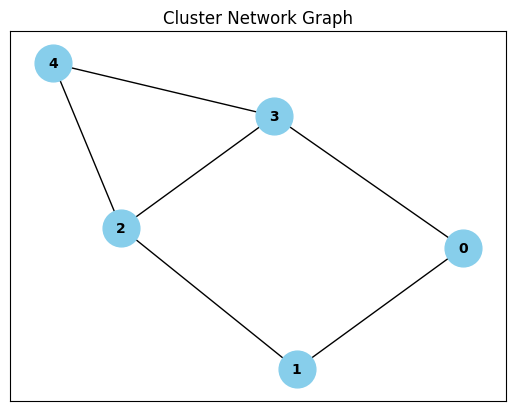

Node 0 start ping 3
Node 0 start ping 2
Node 0 start ping 4
Node 0 start ping 1
Node 1 start ping 3
Node 1 start ping 2
Node 1 start ping 0
Node 1 start ping 4
Node 2 start ping 4
Node 2 start ping 3
Node 2 start ping 1
Node 2 start ping 0
Node 3 start ping 4
Node 3 start ping 2
Node 3 start ping 1
Node 3 start ping 0
Node 4 start ping 3
Node 4 start ping 2
Node 4 start ping 0
Node 4 start ping 1
Node: 0 sending 3 msg_type 1 (Ping)
Node: 0 sending 2 msg_type 1 (Ping)
Node: 0 sending 4 msg_type 1 (Ping)
Node: 0 sending 1 msg_type 1 (Ping)
Node: 1 sending 3 msg_type 1 (Ping)
Node: 1 sending 2 msg_type 1 (Ping)
Node: 1 sending 0 msg_type 1 (Ping)
Node: 1 sending 4 msg_type 1 (Ping)
Node: 2 sending 4 msg_type 1 (Ping)
Node: 2 sending 3 msg_type 1 (Ping)
Node: 2 sending 1 msg_type 1 (Ping)
Node: 2 sending 0 msg_type 1 (Ping)
Node: 3 sending 4 msg_type 1 (Ping)
Node: 3 sending 2 msg_type 1 (Ping)
Node: 3 sending 1 msg_type 1 (Ping)
Node: 3 sending 0 msg_type 1 (Ping)
Node: 4 sending 3 msg_ty

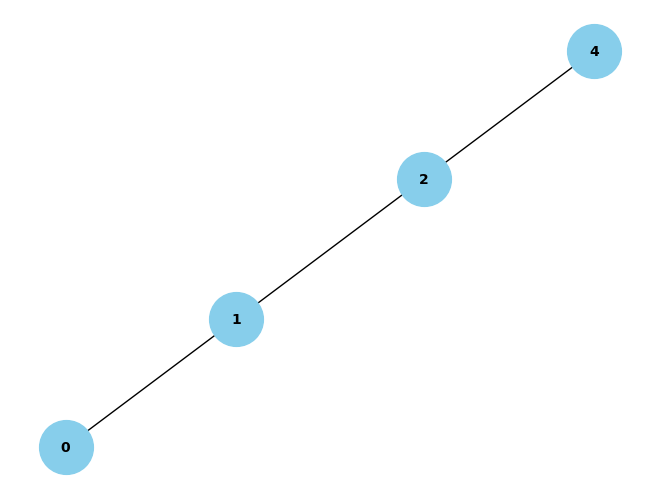

Node 0 start ping 1
Node 1 start ping 2
Node 1 start ping 0
Node 2 start ping 4
Node 2 start ping 1
Node 4 start ping 2
Node: 0 sending 1 msg_type 1 (Ping)
Node: 1 sending 2 msg_type 1 (Ping)
Node: 1 sending 0 msg_type 1 (Ping)
Node: 2 sending 4 msg_type 1 (Ping)
Node: 2 sending 1 msg_type 1 (Ping)
Node: 4 sending 2 msg_type 1 (Ping)
Node 1 mark 3 as failed
Node 3 mark 1 as failed
Node: 0 received from 1 msg_type 1
Node: 1 received from 0 msg_type 1
Node: 1 received from 2 msg_type 1
Node: 2 received from 1 msg_type 1
Node: 2 received from 4 msg_type 1
Node: 4 received from 2 msg_type 1
Node: 0 sending 1 msg_type 2 (Ack)
Node: 1 sending 2 msg_type 2 (Ack)
Node: 1 sending 0 msg_type 2 (Ack)
Node: 2 sending 4 msg_type 2 (Ack)
Node: 2 sending 1 msg_type 2 (Ack)
Node: 4 sending 2 msg_type 2 (Ack)
Node: 0 received from 1 msg_type 2
Node: 1 received from 0 msg_type 2
Node: 1 received from 2 msg_type 2
Node: 2 received from 1 msg_type 2
Node: 2 received from 4 msg_type 2
Node: 4 received from

In [248]:
# Kill node demo
history = tf.keras.callbacks.History()
GG = Compute_Cluster()
GG.generate_small_test_graph()
GG.set_dataset(x_train, y_train, x_test, y_test, 6000, 2)
final_dnn_model_tt = copy.deepcopy(final_dnn_model_3)
GG.set_cluster_dnn_model(final_dnn_model_tt)
GG.start_up(True, False, False, False)
print("***")
print("***")
print("***")

GG.process_initialization()
GG.draw_graph()
i = 0
while(i<100):
    GG.process_states_update()
    GG.message_generation()
    GG.transport_messages()
    GG.message_reception()
    i += 1
    if i == 30:
        GG.kill_node(3)
        print("Killing node 3")




This is killing a node and still completes training demo

***
***
***


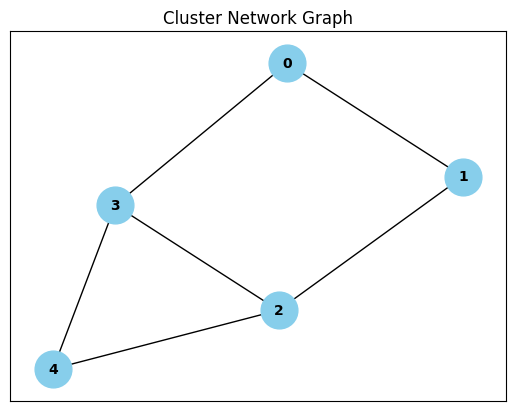

Node 4 updating resource table
Killing node 3
Node 4 updating resource table
Node 4 updating resource table
Node 4 updating resource table
Node 4 starting training
Node: 4 sending 3 msg_type 30 (Training Data)
Node: 4 sending 2 msg_type 30 (Training Data)
Node: 4 sending 1 msg_type 30 (Training Data)
Node: 4 sending 0 msg_type 30 (Training Data)
Node: 4 sending 3 msg_type 30 (Training Data)
Node: 4 sending 2 msg_type 30 (Training Data)
Node: 2 received from 4 msg_type 30
Node: 3 received from 4 msg_type 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1111 - loss: 33.4096 - val_accuracy: 0.1500 - val_loss: 39.5698
Node 2 training data chunk 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0967 - loss: 33.7084 - val_accuracy: 0.1500 - val_loss: 34.2553
Node 3 training data chunk 0
Node: 2 received from 4 msg_type 30
Node: 3 received from 4 msg_type 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1622 - loss: 37.7616 - val_accuracy: 0.2700 - val_loss: 33.9760
Node 2 training 

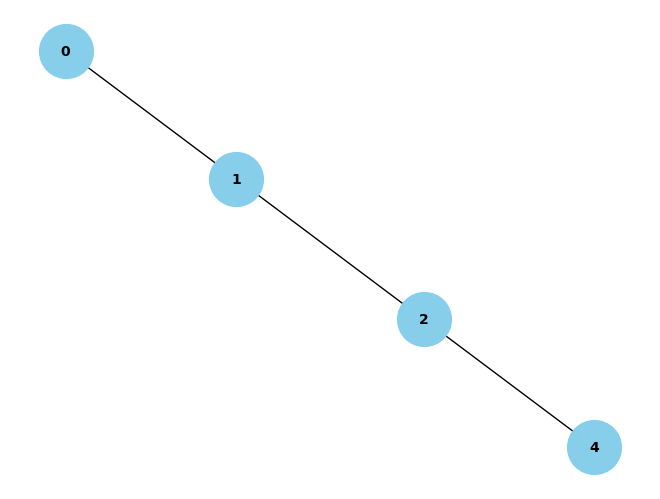

Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 training data chunk 0
Node 3 training data chunk 4
Node 3 trainin

In [249]:
# larger graph
history = tf.keras.callbacks.History()
GG = Compute_Cluster()
GG.generate_small_test_graph()
final_dnn_model_tt2 = copy.deepcopy(final_dnn_model_3)
GG.set_dataset(x_train, y_train, x_test, y_test, 1000, 2)
GG.set_cluster_dnn_model(final_dnn_model_tt2)
GG.start_up(False, False, False, True)
print("***")
print("***")
print("***")

GG.process_initialization()
GG.draw_graph()
i = 0
while(i<500):
    GG.process_states_update()
    GG.message_generation()
    GG.transport_messages()
    GG.message_reception()
    i += 1
    if i == 30:
        GG.kill_node(3)
        print("Killing node 3")



Larger graph no dead node small (6000 images) training set

0, 1
1, 2
***
***
***


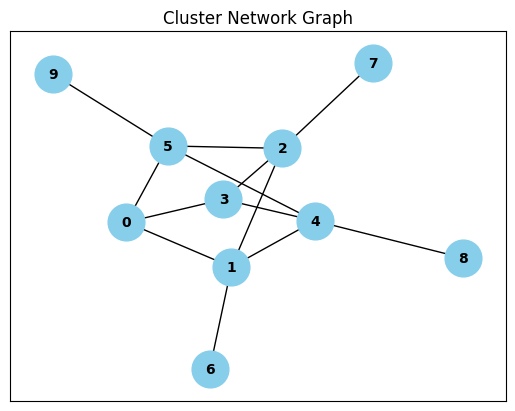

Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 starting training
Node: 9 sending 8 msg_type 30 (Training Data)
Node: 9 sending 7 msg_type 30 (Training Data)
Node: 9 sending 6 msg_type 30 (Training Data)
Node: 9 sending 5 msg_type 30 (Training Data)
Node: 9 sending 4 msg_type 30 (Training Data)
Node: 9 sending 3 msg_type 30 (Training Data)
Node: 9 sending 2 msg_type 30 (Training Data)
Node: 9 sending 1 msg_type 30 (Training Data)
Node: 9 sending 0 msg_type 30 (Training Data)
Node: 9 sending 8 msg_type 30 (Training Data)
Node: 9 sending 7 msg_type 30 (Training Data)
Node: 9 sending 6 msg_type 30 (Training Data)
Node: 5 received from 9 msg_type 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1044 - loss: 33.3601 - val_accuracy: 0.1400 - val_loss: 39

SystemExit: Simulation Complete

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [250]:
# larger graph
history = tf.keras.callbacks.History()
GG = Compute_Cluster()
GG.generate_test_graph()
GG.set_dataset(x_train, y_train, x_test, y_test, 500, 2)
final_dnn_model_tt3 = copy.deepcopy(final_dnn_model_3)
GG.set_cluster_dnn_model(final_dnn_model_tt3)
GG.start_up(False, False, False, True)
print("***")
print("***")
print("***")

GG.process_initialization()
GG.draw_graph()
i = 0
while(i<500):
    GG.process_states_update()
    GG.message_generation()
    GG.transport_messages()
    GG.message_reception()
    i += 1

Larger graph no dead node full (60000 images) training set full run

0, 1
1, 2
***
***
***


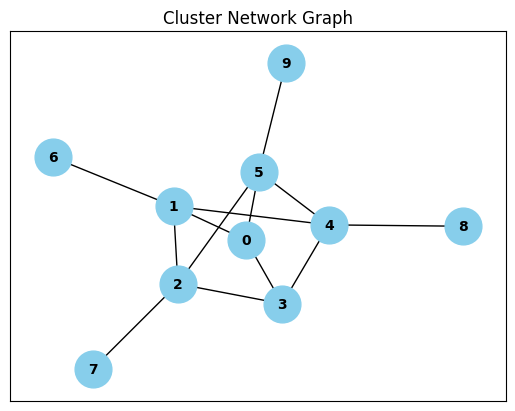

Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 updating resource table
Node 9 starting training
Node: 9 sending 8 msg_type 30 (Training Data)
Node: 9 sending 7 msg_type 30 (Training Data)
Node: 9 sending 6 msg_type 30 (Training Data)
Node: 9 sending 5 msg_type 30 (Training Data)
Node: 9 sending 4 msg_type 30 (Training Data)
Node: 9 sending 3 msg_type 30 (Training Data)
Node: 9 sending 2 msg_type 30 (Training Data)
Node: 9 sending 1 msg_type 30 (Training Data)
Node: 9 sending 0 msg_type 30 (Training Data)
Node: 9 sending 8 msg_type 30 (Training Data)
Node: 9 sending 7 msg_type 30 (Training Data)
Node: 9 sending 6 msg_type 30 (Training Data)
Node: 9 sending 5 msg_type 30 (Training Data)
Node: 9 sending 4 msg_type 30 (Training Data)
Node: 9 sending 3 msg_type 30 (Training Data)
Node: 

SystemExit: Simulation Complete

In [251]:
# larger graph
history = tf.keras.callbacks.History()
GG = Compute_Cluster()
GG.generate_test_graph()
GG.set_dataset(x_train_full, y_train_full, x_test_full, y_test_full, 1000, 2)
final_dnn_model_tt4 = copy.deepcopy(final_dnn_model_3)
GG.set_cluster_dnn_model(final_dnn_model_tt4)
GG.start_up(False, False, False, True)
print("***")
print("***")
print("***")

GG.process_initialization()
GG.draw_graph()
i = 0
while(i<500):
    GG.process_states_update()
    GG.message_generation()
    GG.transport_messages()
    GG.message_reception()
    i += 1